Simple Linear Regression. Minimal example

Import the relevant libraries

In [1]:
import numpy as np                  # Mathematical operations
import matplotlib.pyplot as plt     # Nice graphs
from mpl_toolkits.mplot3d import Axes3D  # Nice 3D graphs

Generate Random input data to train on

In [2]:
observations = 1000 # Try with 100,000 or even 10,000,000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

#combine into one matrix
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

# y = xw + b
targets = 2*xs - 3*zs + 5 + noise # Arbitrary picks

print(targets.shape)

(1000, 1)


Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce

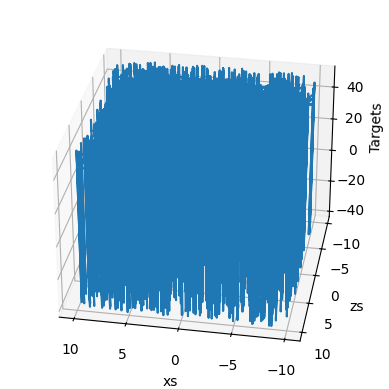

In [4]:
# To use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111,projection='3d')

# Choose the axes.
ax.plot(xs,zs,targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# Play around with the azim parameter to plot the data from different angles. Change azim=100
ax.view_init(azim=100)

# After describing the plot, this method will show the plot
plt.show()

targets = targets.reshape(observations,1)

Initialize Variables

In [5]:
init_range = 0.1 # radious of the length to initialize the weights and biases

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[0.08337738]
 [0.09048067]]
[-0.0066368]


Set a learning rate

In [6]:
learning_rate = 0.02

Train the model

In [7]:
for i in range(100):
    # y = xw + b
    outputs = np.dot(inputs,weights) + biases
    
    # record difference between outputs and targets in deltas
    deltas = outputs - targets
    
    # calculate the loss. Using l2-norm loss / 2
    loss = np.sum(deltas**2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    # update weights and biases for better results next iteration
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

232.8459762643777
37.61679753217413
14.529773744407848
11.45051600745756
10.712223933685845
10.26126135246188
9.858185929722382
9.474552185363168
9.106497004215871
8.753043324124201
8.41357158388816
8.087523969896072
7.774369083565966
7.473597049699507
7.184718214664082
6.9072622938800246
6.640777599701972
6.3848303053209365
6.1390037384202385
5.902897702838301
5.676127827063472
5.458324938491884
5.249134462428687
5.048215844854143
4.85524199801481
4.669898767937319
4.491884422997825
4.320909162714581
4.156694645963926
3.9989735378516844
3.847489074502295
3.7019946450571095
3.56225339020145
3.4280378165667837
3.299129426380293
3.175318361758952
3.0564030630689794
2.9421899407945427
2.832493060381497
2.72713383954311
2.6259407575349947
2.528749075925954
2.435400570410171
2.345743273224164
2.259631225749109
2.1769242408958682
2.097487674885797
2.0211922080558855
1.9479136343313384
1.8775326590228707
1.8099347046195657
1.7450097242611096
1.6826520225857484
1.6227600836623208
1.56523640572

Print weights and biases and see if we have worked correctly

In [8]:
print(weights, biases)

[[ 1.9973004 ]
 [-3.00638678]] [4.31771256]


Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

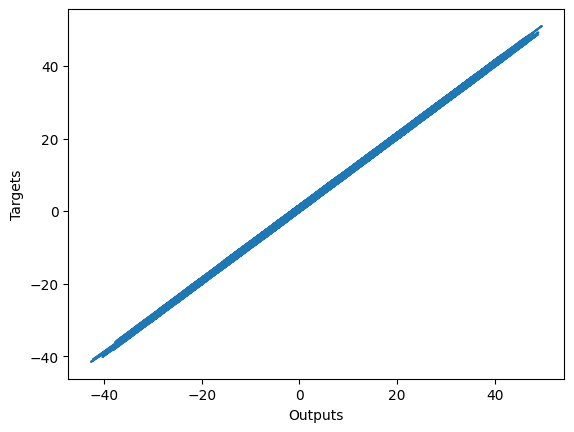

In [9]:
plt.plot(outputs,targets)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()